In this part of the notebook, we begin the EDA using the cleaned NYC 311 dataset.
The goal is to explore the temporal patterns in complaint activity, understand differences across boroughs and complaint types, and analyze how service requests are created, closed, and resolved over time.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
df = pd.read_csv('../raw_data/clean_nyc_311_requests.csv')

/tmp/ipykernel_89493/4234651313.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../raw_data/clean_nyc_311_requests.csv')


In [6]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Borough,Status,Latitude,Longitude,Year,Month,Week Day,Hour,Resolution_time Hours,Resolution_time Days
0,66998447,2025-11-30 20:11:09,2025-11-30 21:57:45,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10461.0,BRONX,Closed,40.839383,-73.845302,2025,11,Sunday,20,1.776667,0.074028
1,66999600,2025-11-30 20:11:04,2025-11-30 20:48:31,NYPD,New York City Police Department,Non-Emergency Police Matter,Trespassing,Residential Building/House,11231.0,BROOKLYN,Closed,40.674069,-74.002188,2025,11,Sunday,20,0.624167,0.026007
2,66997399,2025-11-30 20:10:49,2025-12-01 00:00:08,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10466.0,BRONX,Closed,40.891872,-73.860168,2025,11,Sunday,20,3.821944,0.159248
3,67000529,2025-11-30 20:10:47,2025-12-02 15:55:10,DCWP,Department of Consumer and Worker Protection,Consumer Complaint,"Bodega, Deli, or Convenience Store",Business,11237.0,BROOKLYN,Closed,40.703016,-73.925736,2025,11,Sunday,20,43.739722,1.822488
4,66998834,2025-11-30 20:10:19,2025-12-03 08:40:54,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,10019.0,MANHATTAN,Closed,40.765993,-73.985206,2025,11,Sunday,20,60.509722,2.521238


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295008 entries, 0 to 295007
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unique Key             295008 non-null  int64  
 1   Created Date           295008 non-null  object 
 2   Closed Date            268244 non-null  object 
 3   Agency                 295008 non-null  object 
 4   Agency Name            295008 non-null  object 
 5   Complaint Type         295008 non-null  object 
 6   Descriptor             290008 non-null  object 
 7   Location Type          264942 non-null  object 
 8   Incident Zip           295008 non-null  object 
 9   Borough                295008 non-null  object 
 10  Status                 295008 non-null  object 
 11  Latitude               292165 non-null  float64
 12  Longitude              292165 non-null  float64
 13  Year                   295008 non-null  int64  
 14  Month                  295008 non-nu

In [8]:
df.nunique()

Unique Key               295008
Created Date             244723
Closed Date              184072
Agency                       15
Agency Name                  15
Complaint Type              172
Descriptor                  769
Location Type               108
Incident Zip                297
Borough                       6
Status                        7
Latitude                 107242
Longitude                107241
Year                          1
Month                         1
Week Day                      7
Hour                         24
Resolution_time Hours    112814
Resolution_time Days     112814
dtype: int64

### Create and Closed Data Analysis

In [9]:
df['Created Date'] = pd.to_datetime(df['Created Date'],errors='coerce')
df['Closed Date'] = pd.to_datetime(df['Closed Date'],errors='coerce')

In [10]:
# Extract only the date portion to aggregate by day.
# Example: 2025-11-30 21:57:45 → 2025-11-30.

df["Created Day"] = df["Created Date"].dt.date
df["Closed Day"] = df["Closed Date"].dt.date

In [11]:
daily_created = df.groupby('Created Day').size()
daily_created

Created Day
2025-11-01     2266
2025-11-02     9472
2025-11-03    11044
2025-11-04     9611
2025-11-05    10380
2025-11-06    11059
2025-11-07    10430
2025-11-08     9465
2025-11-09     8187
2025-11-10    11362
2025-11-11    12172
2025-11-12    13455
2025-11-13    10574
2025-11-14    10110
2025-11-15     8891
2025-11-16     8951
2025-11-17    11540
2025-11-18    10745
2025-11-19    10207
2025-11-20    11177
2025-11-21    10087
2025-11-22     8519
2025-11-23     9094
2025-11-24    10182
2025-11-25     9363
2025-11-26     9979
2025-11-27     8147
2025-11-28    10284
2025-11-29    10094
2025-11-30     8161
dtype: int64

In [12]:
daily_closed = df.groupby('Closed Day').size()
daily_closed

Closed Day
2025-10-31        6
2025-11-01      928
2025-11-02     6003
2025-11-03     6848
2025-11-04     6473
2025-11-05     8636
2025-11-06     7737
2025-11-07     8570
2025-11-08     8444
2025-11-09     7432
2025-11-10     8685
2025-11-11     7466
2025-11-12    12468
2025-11-13    10292
2025-11-14    10036
2025-11-15     8462
2025-11-16     8258
2025-11-17    10192
2025-11-18     9855
2025-11-19    10008
2025-11-20     9391
2025-11-21     8788
2025-11-22     8431
2025-11-23     8192
2025-11-24     9690
2025-11-25     9020
2025-11-26    10680
2025-11-27     6597
2025-11-28    10948
2025-11-29     7938
2025-11-30     8239
2025-12-01     5644
2025-12-02     2895
2025-12-03     1747
2025-12-04     1440
2025-12-05     1055
2025-12-06      402
2025-12-07      348
dtype: int64

In [13]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Borough,...,Latitude,Longitude,Year,Month,Week Day,Hour,Resolution_time Hours,Resolution_time Days,Created Day,Closed Day
0,66998447,2025-11-30 20:11:09,2025-11-30 21:57:45,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10461.0,BRONX,...,40.839383,-73.845302,2025,11,Sunday,20,1.776667,0.074028,2025-11-30,2025-11-30
1,66999600,2025-11-30 20:11:04,2025-11-30 20:48:31,NYPD,New York City Police Department,Non-Emergency Police Matter,Trespassing,Residential Building/House,11231.0,BROOKLYN,...,40.674069,-74.002188,2025,11,Sunday,20,0.624167,0.026007,2025-11-30,2025-11-30
2,66997399,2025-11-30 20:10:49,2025-12-01 00:00:08,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10466.0,BRONX,...,40.891872,-73.860168,2025,11,Sunday,20,3.821944,0.159248,2025-11-30,2025-12-01
3,67000529,2025-11-30 20:10:47,2025-12-02 15:55:10,DCWP,Department of Consumer and Worker Protection,Consumer Complaint,"Bodega, Deli, or Convenience Store",Business,11237.0,BROOKLYN,...,40.703016,-73.925736,2025,11,Sunday,20,43.739722,1.822488,2025-11-30,2025-12-02
4,66998834,2025-11-30 20:10:19,2025-12-03 08:40:54,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,10019.0,MANHATTAN,...,40.765993,-73.985206,2025,11,Sunday,20,60.509722,2.521238,2025-11-30,2025-12-03


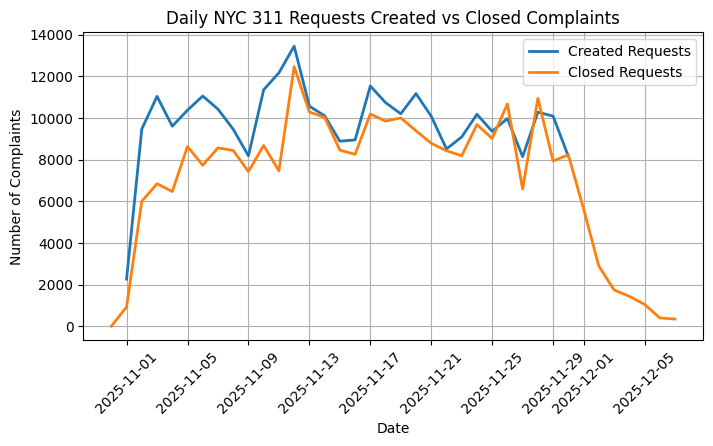

In [ ]:
# Count number of requests created/closed per day.
# Helps measure system load and closure efficiency.

plt.figure(figsize=(8,4))
plt.plot(daily_created.index, daily_created.values,linewidth=2 , label='Created Requests')
plt.plot(daily_closed.index, daily_closed.values,linewidth=2, label='Closed Requests')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.title('Daily NYC 311 Requests Created vs Closed Complaints')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

### Weekday analyis

In [ ]:
# Count complaints by weekday.
# Identify operational peaks

weekday_created = df["Week Day"].value_counts()
weekday_created.columns = ['Week Day', 'total_created']
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_created = weekday_created.reindex(weekday_order)

In [16]:
weekday_created

Week Day
Monday       44128
Tuesday      41891
Wednesday    44021
Thursday     40957
Friday       40911
Saturday     39235
Sunday       43865
Name: count, dtype: int64

In [17]:
df['Closed_Day'] = pd.to_datetime(df['Closed Day'], errors='coerce')
df['Closed_Weekday'] = df['Closed_Day'].dt.day_name()

In [18]:
weekday_closed = df['Closed_Weekday'].value_counts()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_closed = weekday_closed.reindex(weekday_order)
weekday_closed

Closed_Weekday
Monday       41059
Tuesday      35709
Wednesday    43539
Thursday     35457
Friday       39403
Saturday     34605
Sunday       38472
Name: count, dtype: int64

In [19]:
# we need to do this because if the month has different number of each weekday, then counting the raw values will be misleading
unique_days = df[['Created Day', 'Week Day']].drop_duplicates()

weekday_num_days = unique_days['Week Day'].value_counts()

weekday_num_days = weekday_num_days.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
weekday_num_days


Week Day
Monday       4
Tuesday      4
Wednesday    4
Thursday     4
Friday       4
Saturday     5
Sunday       5
Name: count, dtype: int64

In [20]:
# Weekday summary
weekday_summary = pd.DataFrame({
    'total_created': weekday_created,
    'num_days': weekday_num_days
})

weekday_summary['avg_created_per_day'] = (
    weekday_summary['total_created'] / weekday_summary['num_days']
)

weekday_summary = weekday_summary.reset_index()
weekday_summary.columns = ['Week Day', 'total_created', 'num_days', 'avg_created_per_day']

weekday_closed_summary = pd.DataFrame({
    'total_closed': weekday_closed,
    'num_days_closed': weekday_num_days
})

weekday_closed_summary['avg_closed_per_day'] = (
    weekday_closed_summary['total_closed'] / weekday_closed_summary['num_days_closed']
)

weekday_closed_summary = weekday_closed_summary.reset_index()
weekday_closed_summary.columns = ['Week Day', 'total_closed', 'num_days_closed', 'avg_closed_per_day']


#merge created and closed
weekday_combined = pd.merge(
    weekday_summary,
    weekday_closed_summary,
    on='Week Day',
    how='inner'
)
weekday_combined['avg_diff_created_minus_closed'] = (
    weekday_combined['avg_created_per_day'] - weekday_combined['avg_closed_per_day']
)
weekday_combined


,Week Day,total_created,num_days,avg_created_per_day,total_closed,num_days_closed,avg_closed_per_day,avg_diff_created_minus_closed
0,Monday,44128,4,11032.00,41059,4,10264.75,767.25
1,Tuesday,41891,4,10472.75,35709,4,8927.25,1545.50
2,Wednesday,44021,4,11005.25,43539,4,10884.75,120.50
3,Thursday,40957,4,10239.25,35457,4,8864.25,1375.00
4,Friday,40911,4,10227.75,39403,4,9850.75,377.00
5,Saturday,39235,5,7847.00,34605,5,6921.00,926.00
6,Sunday,43865,5,8773.00,38472,5,7694.40,1078.60


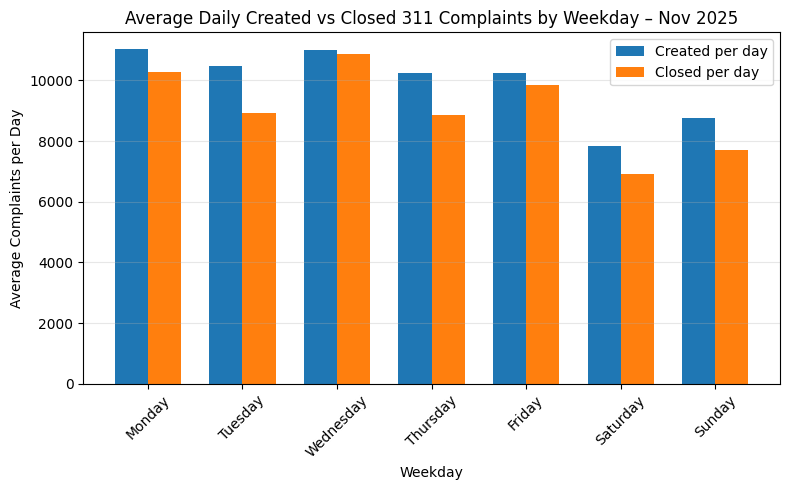

In [21]:
weekdays = weekday_combined['Week Day']
created = weekday_combined['avg_created_per_day']
closed = weekday_combined['avg_closed_per_day']

# Bar positions
x = np.arange(len(weekdays))
width = 0.35  

plt.figure(figsize=(8, 5))

# Bars
plt.bar(x - width/2, created, width, label='Created per day')
plt.bar(x + width/2, closed, width, label='Closed per day')

# Labels & Title
plt.xlabel('Weekday')
plt.ylabel('Average Complaints per Day')
plt.title('Average Daily Created vs Closed 311 Complaints by Weekday – Nov 2025')
plt.xticks(x, weekdays, rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

more activity on week days, less on weekends
Average daily complaints are highest on Mondays and Wednesdays, reflecting both weekend backlog and mid-week activity. Tuesday, Thursday, and Friday remain stable around 10,200–10,400 complaints per day. Weekend volumes drop significantly, with Saturdays lowest and Sundays slightly higher, a pattern consistent with reduced city operations and shifts in resident reporting behavior.

### Hourly Analysis

In [ ]:
# Extract hour from timestamps to analyze day activity.
# Reveals complaint patterns

df['Closed_Hour'] = df['Closed Date'].dt.hour

In [23]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Borough,...,Month,Week Day,Hour,Resolution_time Hours,Resolution_time Days,Created Day,Closed Day,Closed_Day,Closed_Weekday,Closed_Hour
0,66998447,2025-11-30 20:11:09,2025-11-30 21:57:45,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10461.0,BRONX,...,11,Sunday,20,1.776667,0.074028,2025-11-30,2025-11-30,2025-11-30,Sunday,21.0
1,66999600,2025-11-30 20:11:04,2025-11-30 20:48:31,NYPD,New York City Police Department,Non-Emergency Police Matter,Trespassing,Residential Building/House,11231.0,BROOKLYN,...,11,Sunday,20,0.624167,0.026007,2025-11-30,2025-11-30,2025-11-30,Sunday,20.0
2,66997399,2025-11-30 20:10:49,2025-12-01 00:00:08,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10466.0,BRONX,...,11,Sunday,20,3.821944,0.159248,2025-11-30,2025-12-01,2025-12-01,Monday,0.0
3,67000529,2025-11-30 20:10:47,2025-12-02 15:55:10,DCWP,Department of Consumer and Worker Protection,Consumer Complaint,"Bodega, Deli, or Convenience Store",Business,11237.0,BROOKLYN,...,11,Sunday,20,43.739722,1.822488,2025-11-30,2025-12-02,2025-12-02,Tuesday,15.0
4,66998834,2025-11-30 20:10:19,2025-12-03 08:40:54,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,10019.0,MANHATTAN,...,11,Sunday,20,60.509722,2.521238,2025-11-30,2025-12-03,2025-12-03,Wednesday,8.0


In [24]:
hourly_created = df['Hour'].value_counts().sort_index()

In [25]:
hourly_created = hourly_created.reset_index()
hourly_created.columns = ['Hour', 'total_created']
hourly_created

,Hour,total_created
0,0,9888
1,1,7373
2,2,4903
3,3,4298
4,4,4300
5,5,5045
6,6,7499
7,7,12220
8,8,15459
9,9,17222


In [26]:
hourly_closed = df['Closed_Hour'].value_counts().sort_index()
hourly_closed = hourly_closed.reset_index()
hourly_closed.columns = ['Hour', 'total_closed']
hourly_closed

,Hour,total_closed
0,0.0,14434
1,1.0,7983
2,2.0,9192
3,3.0,5956
4,4.0,4492
5,5.0,4251
6,6.0,4996
7,7.0,5882
8,8.0,11090
9,9.0,13028


In [27]:
# Rebuild created-by-hour table
hourly_created = (
    df['Hour']
    .value_counts()
    .sort_index()
    .reset_index()
)
hourly_created.columns = ['Hour', 'total_created']

# Rebuild closed-by-hour table
hourly_closed = (
    df['Closed_Hour']
    .value_counts()
    .sort_index()
    .reset_index()
)
hourly_closed.columns = ['Hour', 'total_closed']

hourly_created.head(), hourly_closed.head()


(   Hour  total_created
 0     0           9888
 1     1           7373
 2     2           4903
 3     3           4298
 4     4           4300,
    Hour  total_closed
 0   0.0         14434
 1   1.0          7983
 2   2.0          9192
 3   3.0          5956
 4   4.0          4492)

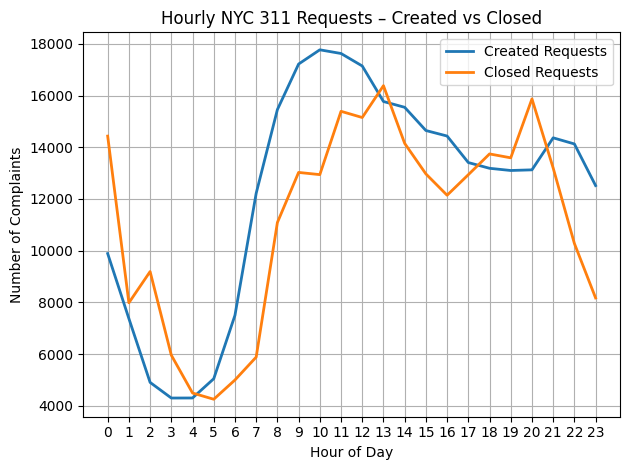

In [28]:
plt.plot(
    hourly_created['Hour'],
    hourly_created['total_created'],
    linewidth=2,
    label='Created Requests'
)

plt.plot(
    hourly_closed['Hour'],
    hourly_closed['total_closed'],
    linewidth=2,
    label='Closed Requests'
)

plt.xlabel('Hour of Day')
plt.ylabel('Number of Complaints')
plt.title('Hourly NYC 311 Requests – Created vs Closed')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### WeekDay X Hourly

In [29]:
heatmap_data = df.pivot_table(
    index='Week Day',       # rows
    columns='Hour',         # columns
    values='Unique Key',    # any column that isn't null per row
    aggfunc='count'
)


In [30]:
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
heatmap_data = heatmap_data.reindex(weekday_order)


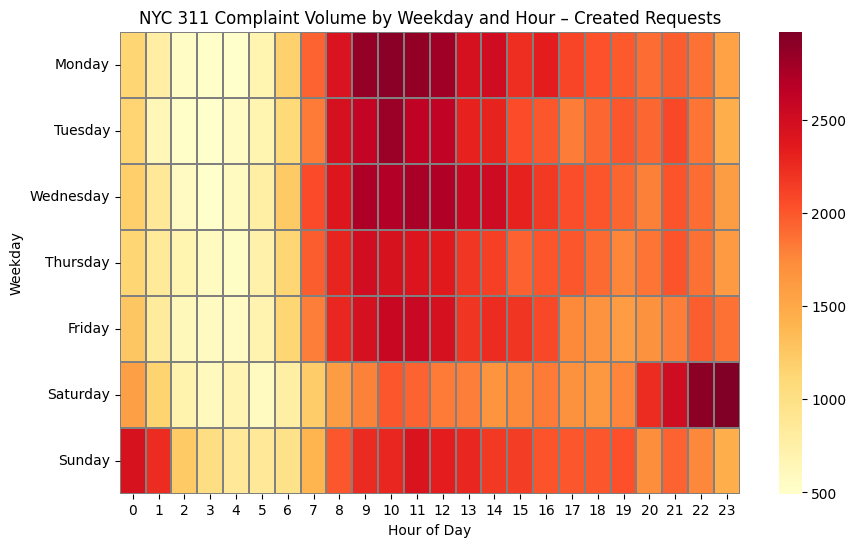

In [31]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    cmap='YlOrRd',
    linewidths=0.3,
    linecolor='gray'
)

plt.title('NYC 311 Complaint Volume by Weekday and Hour – Created Requests')
plt.xlabel('Hour of Day')
plt.ylabel('Weekday')

plt.show()


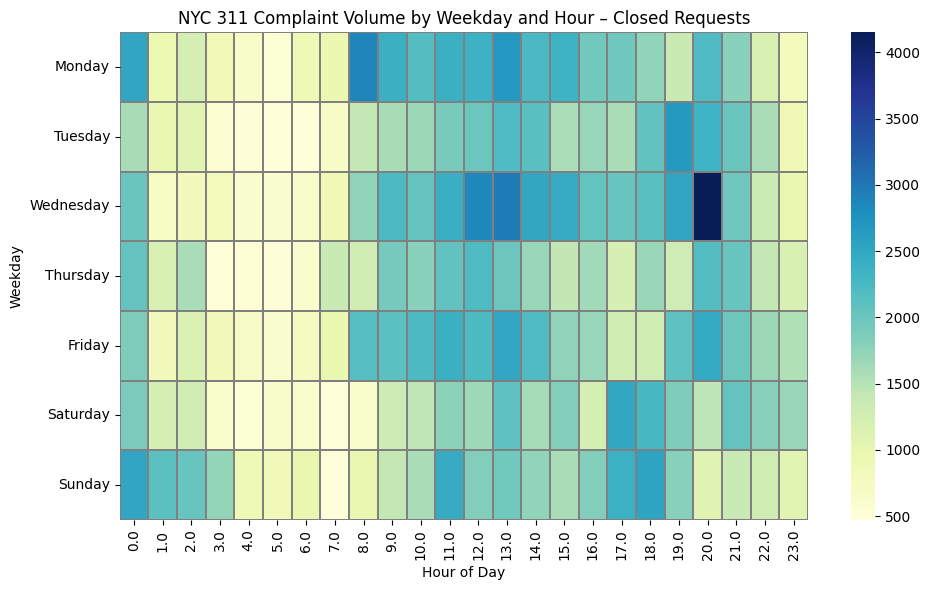

In [32]:
closed_heatmap = df.pivot_table(
    index='Closed_Weekday',
    columns='Closed_Hour',
    values='Unique Key',
    aggfunc='count'
)

# Order weekdays correctly
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
closed_heatmap = closed_heatmap.reindex(weekday_order)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    closed_heatmap,
    cmap='YlGnBu',
    linewidths=0.3,
    linecolor='gray'
)

plt.title('NYC 311 Complaint Volume by Weekday and Hour – Closed Requests')
plt.xlabel('Hour of Day')
plt.ylabel('Weekday')

plt.tight_layout()
plt.show()

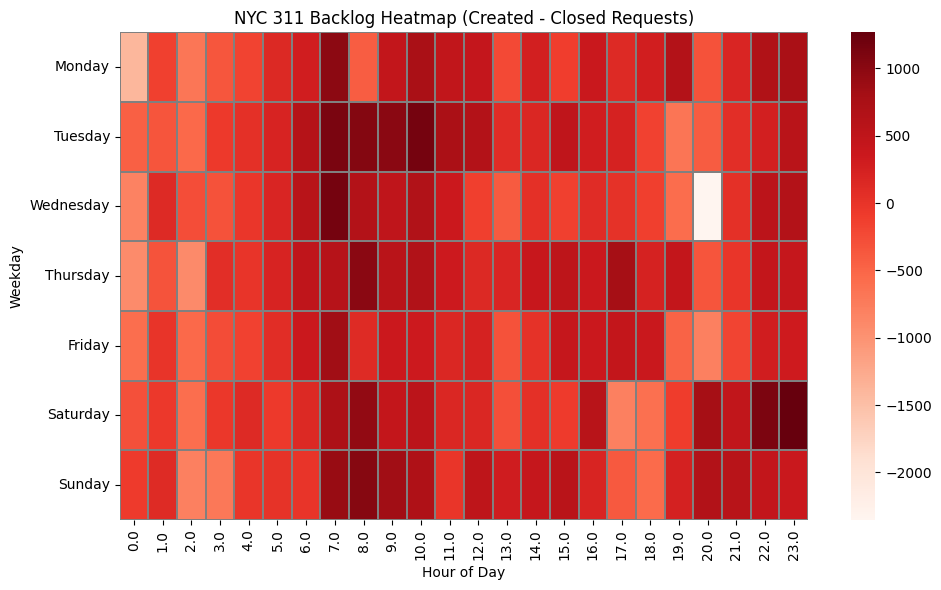

In [33]:
created_aligned = heatmap_data.reindex_like(closed_heatmap)

backlog_heatmap = created_aligned - closed_heatmap # positive = more created than closed

# Plot backlog
plt.figure(figsize=(10, 6))
sns.heatmap(
    backlog_heatmap,
    cmap='Reds',         
    linewidths=0.3,
    linecolor='gray'
)

plt.title('NYC 311 Backlog Heatmap (Created - Closed Requests)')
plt.xlabel('Hour of Day')
plt.ylabel('Weekday')

plt.tight_layout()
plt.show()


### Resolution Time Analysis

In [34]:
rt = df['Resolution_time Hours'].dropna()

basic_stats = {
    "count": rt.count(),
    "mean_hours": rt.mean(),
    "median_hours": rt.median(),
    "min_hours": rt.min(),
    "max_hours": rt.max(),
    "pct_90_hours": np.percentile(rt, 90),
    "pct_95_hours": np.percentile(rt, 95)
}

basic_stats

{'count': np.int64(268244),
 'mean_hours': np.float64(41.489886192960306),
 'median_hours': np.float64(4.724722222222222),
 'min_hours': np.float64(-178.6),
 'max_hours': np.float64(854.3844444444444),
 'pct_90_hours': np.float64(118.21469444444445),
 'pct_95_hours': np.float64(215.2633333333333)}

In [35]:
bins = [0, 1, 24, 72, 168, rt.max()]  # 1h, 24h, 3d, 7d
labels = ["<1 hour", "1–24 hours", "1–3 days", "3–7 days", ">7 days"]

df['resolution_bucket'] = pd.cut(rt, bins=bins, labels=labels, include_lowest=True)

bucket_counts = df['resolution_bucket'].value_counts().sort_index()
bucket_counts

resolution_bucket
<1 hour        67571
1–24 hours    109463
1–3 days       51182
3–7 days       21043
>7 days        18887
Name: count, dtype: int64

In [36]:

weekday_resolution = (
    df.groupby('Week Day')['Resolution_time Hours']
    .agg(['count', 'median'])
    .reset_index()
)

weekday_resolution


,Week Day,count,median
0,Friday,36793,4.253611
1,Monday,39386,10.082083
2,Saturday,36572,2.645833
3,Sunday,40796,3.024722
4,Thursday,37278,6.014583
5,Tuesday,37549,9.983333
6,Wednesday,39870,4.575000


In [37]:
complaint_resolution = (
    df.groupby('Complaint Type')['Resolution_time Hours']
    .agg(['count', 'median', 'mean'])
    .reset_index()
)

complaint_resolution


,Complaint Type,count,median,mean
0,AHV Inspection Unit,1,3.084722,3.084722
1,APPLIANCE,1086,166.635556,210.698665
2,Abandoned Bike,139,65.430278,102.658066
3,Abandoned Vehicle,4779,2.121389,3.795433
4,Air Quality,527,52.416667,73.082701
...,...,...,...,...
167,Water Quality,70,43.833333,73.245714
168,Water System,3302,7.608333,48.346305
169,Wayfinding,0,NaN,NaN
170,Window Guard,3,24.050556,24.083333


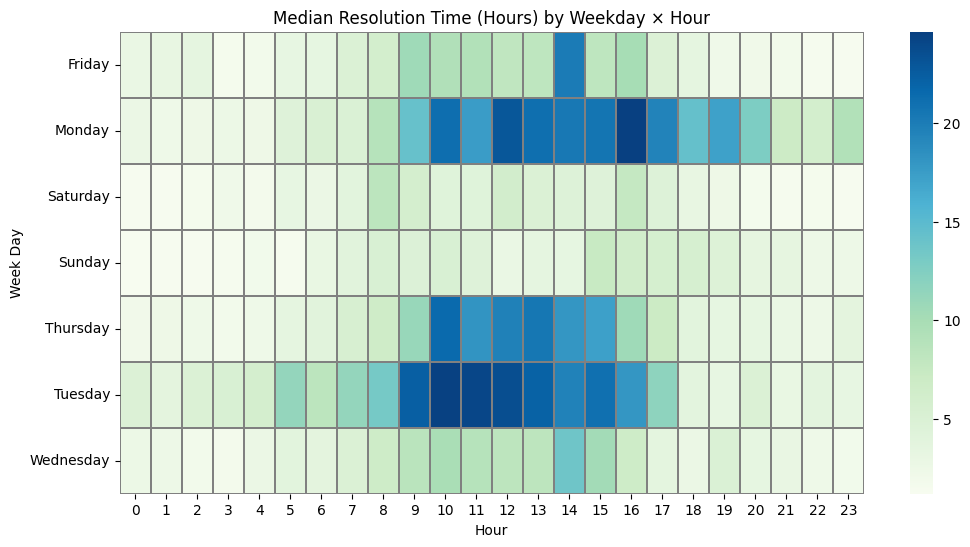

In [38]:
resolution_heatmap = (
    df.pivot_table(
        index='Week Day',
        columns='Hour',
        values='Resolution_time Hours',
        aggfunc='median'
    )
)
plt.figure(figsize=(12,6))
sns.heatmap(resolution_heatmap, cmap='GnBu', linewidths=0.3, linecolor='gray')
plt.title("Median Resolution Time (Hours) by Weekday × Hour")
plt.show()


### Status Analyses

In [39]:
status_counts = df['Status'].value_counts()
status_counts

Status
Closed         264612
Open            17620
In Progress     10840
Assigned         1269
Started           424
Pending           219
Unspecified        24
Name: count, dtype: int64

### Top Complaint Types

In [40]:
top_types = complaint_resolution.sort_values('count', ascending=False).head(20)
top_types

,Complaint Type,count,median,mean
65,HEAT/HOT WATER,46424,34.287639,36.310291
77,Illegal Parking,45722,1.432083,2.644733
105,Noise - Residential,42177,1.048056,2.037176
15,Blocked Driveway,15439,1.520278,2.752566
106,Noise - Street/Sidewalk,9498,1.052361,1.832805
156,UNSANITARY CONDITION,5894,168.695000,212.279457
101,Noise - Commercial,4841,0.923056,1.707150
3,Abandoned Vehicle,4779,2.121389,3.795433
100,Noise,4372,70.816667,98.417852
38,Dirty Condition,3852,26.796528,40.501555


### Complaints By Borough

In [41]:
borough_counts = df['Borough'].value_counts()
borough_counts

Borough
BROOKLYN         85810
BRONX            72520
QUEENS           67261
MANHATTAN        59676
STATEN ISLAND     9551
Unspecified        190
Name: count, dtype: int64

In [42]:
top_by_borough = (
    df.groupby(['Borough', 'Complaint Type'])
      .size()
      .reset_index(name='count')
)
top_by_borough

,Borough,Complaint Type,count
0,BRONX,APPLIANCE,737
1,BRONX,Abandoned Bike,4
2,BRONX,Abandoned Vehicle,684
3,BRONX,Air Quality,41
4,BRONX,Animal in a Park,32
...,...,...,...
738,Unspecified,Taxi Licensee Complaint,1
739,Unspecified,Taxi Report,5
740,Unspecified,Traffic,1
741,Unspecified,Traffic Signal Condition,12


### Geospatial Analysis

In [43]:
df[['Latitude','Longitude']].isna().sum()

Latitude     2843
Longitude    2843
dtype: int64

In [44]:
zip_counts = df['Incident Zip'].value_counts()
zip_counts

Incident Zip
10466.0    16811
11226.0     5034
11368.0     4428
10456.0     4181
10458.0     4162
           ...  
11237.0        1
11378.0        1
10032.0        1
10457.0        1
11436.0        1
Name: count, Length: 297, dtype: int64

### Summary

In [45]:
total_complaints = len(df)

In [46]:
total_closed = df[df['Status'] == 'Closed'].shape[0]

In [47]:
total_open = df[df['Status'] != 'Closed'].shape[0]

In [48]:
avg_res_time = df['Resolution_time Hours'].mean()
median_res_time = df['Resolution_time Hours'].median()


In [49]:
top_5 = top_types.head(5)[['Complaint Type','count']]

In [50]:
busiest_weekday = weekday_created.idxmax()

In [51]:
busiest_weekday_count = weekday_created.max()

In [52]:
hour_counts = df['Hour'].value_counts()
busiest_hour = hour_counts.idxmax()
busiest_hour_count = hour_counts.max()

In [53]:
summary_table = {
    'total_complaints': total_complaints,
    'total_closed': total_closed,
    'total_open': total_open,
    'avg_resolution_hours': avg_res_time,
    'median_resolution_hours': median_res_time,
    'top_5_complaint_types': list(top_5['Complaint Type']),
    'busiest_weekday': busiest_weekday,
    'busiest_hour': busiest_hour
}

summary_table

{'total_complaints': 295008,
 'total_closed': 264612,
 'total_open': 30396,
 'avg_resolution_hours': np.float64(41.489886192960306),
 'median_resolution_hours': np.float64(4.724722222222222),
 'top_5_complaint_types': ['HEAT/HOT WATER',
  'Illegal Parking',
  'Noise - Residential',
  'Blocked Driveway',
  'Noise - Street/Sidewalk'],
 'busiest_weekday': 'Monday',
 'busiest_hour': np.int64(10)}

In [54]:
pd.DataFrame([summary_table])

,total_complaints,total_closed,total_open,avg_resolution_hours,median_resolution_hours,top_5_complaint_types,busiest_weekday,busiest_hour
0,295008,264612,30396,41.489886,4.724722,"[HEAT/HOT WATER, Illegal Parking, Noise - Resi...",Monday,10


### CSV Exports

In [55]:
final_df = df.drop(columns=['Unnamed: 0'], errors='ignore')

In [56]:
final_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Borough,...,Week Day,Hour,Resolution_time Hours,Resolution_time Days,Created Day,Closed Day,Closed_Day,Closed_Weekday,Closed_Hour,resolution_bucket
0,66998447,2025-11-30 20:11:09,2025-11-30 21:57:45,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10461.0,BRONX,...,Sunday,20,1.776667,0.074028,2025-11-30,2025-11-30,2025-11-30,Sunday,21.0,1–24 hours
1,66999600,2025-11-30 20:11:04,2025-11-30 20:48:31,NYPD,New York City Police Department,Non-Emergency Police Matter,Trespassing,Residential Building/House,11231.0,BROOKLYN,...,Sunday,20,0.624167,0.026007,2025-11-30,2025-11-30,2025-11-30,Sunday,20.0,<1 hour
2,66997399,2025-11-30 20:10:49,2025-12-01 00:00:08,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10466.0,BRONX,...,Sunday,20,3.821944,0.159248,2025-11-30,2025-12-01,2025-12-01,Monday,0.0,1–24 hours
3,67000529,2025-11-30 20:10:47,2025-12-02 15:55:10,DCWP,Department of Consumer and Worker Protection,Consumer Complaint,"Bodega, Deli, or Convenience Store",Business,11237.0,BROOKLYN,...,Sunday,20,43.739722,1.822488,2025-11-30,2025-12-02,2025-12-02,Tuesday,15.0,1–3 days
4,66998834,2025-11-30 20:10:19,2025-12-03 08:40:54,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,10019.0,MANHATTAN,...,Sunday,20,60.509722,2.521238,2025-11-30,2025-12-03,2025-12-03,Wednesday,8.0,1–3 days


In [57]:
#final_df.to_csv("../data/clean_311_final.csv", index=False)

In [58]:
weekday_combined.head()

,Week Day,total_created,num_days,avg_created_per_day,total_closed,num_days_closed,avg_closed_per_day,avg_diff_created_minus_closed
0,Monday,44128,4,11032.00,41059,4,10264.75,767.25
1,Tuesday,41891,4,10472.75,35709,4,8927.25,1545.50
2,Wednesday,44021,4,11005.25,43539,4,10884.75,120.50
3,Thursday,40957,4,10239.25,35457,4,8864.25,1375.00
4,Friday,40911,4,10227.75,39403,4,9850.75,377.00


In [59]:
#weekday_combined.to_csv("../data/weekday_combined.csv", index=False)

In [60]:
top_types.head(20)

,Complaint Type,count,median,mean
65,HEAT/HOT WATER,46424,34.287639,36.310291
77,Illegal Parking,45722,1.432083,2.644733
105,Noise - Residential,42177,1.048056,2.037176
15,Blocked Driveway,15439,1.520278,2.752566
106,Noise - Street/Sidewalk,9498,1.052361,1.832805
156,UNSANITARY CONDITION,5894,168.695000,212.279457
101,Noise - Commercial,4841,0.923056,1.707150
3,Abandoned Vehicle,4779,2.121389,3.795433
100,Noise,4372,70.816667,98.417852
38,Dirty Condition,3852,26.796528,40.501555


In [61]:
#top_types.to_csv("../data/top_complaint_types.csv", index=False)

In [62]:
# 4. Summary KPI table

# total complaints
total_complaints = len(final_df)

# total closed / open (assuming Status column exists)
total_closed = final_df[final_df['Status'] == 'Closed'].shape[0]
total_open   = final_df[final_df['Status'] != 'Closed'].shape[0]

# resolution stats (hours)
avg_res_hours    = final_df['Resolution_time Hours'].mean()
median_res_hours = final_df['Resolution_time Hours'].median()

# busiest weekday (by created)
weekday_counts = final_df['Week Day'].value_counts()
busiest_weekday = weekday_counts.idxmax()

# busiest hour (by created)
hour_counts = final_df['Hour'].value_counts()
busiest_hour = int(hour_counts.idxmax())

# build single-row summary table
summary_table = pd.DataFrame([{
    "total_complaints": total_complaints,
    "total_closed": total_closed,
    "total_open": total_open,
    "avg_resolution_hours": avg_res_hours,
    "median_resolution_hours": median_res_hours,
    "busiest_weekday": busiest_weekday,
    "busiest_hour": busiest_hour
}])
summary_table

,total_complaints,total_closed,total_open,avg_resolution_hours,median_resolution_hours,busiest_weekday,busiest_hour
0,295008,264612,30396,41.489886,4.724722,Monday,10


In [63]:
#summary_table.to_csv("../data/summary_table.csv", index=False)

In [64]:
#resolution_heatmap.to_csv("../data/resolution_heatmap.csv")